In [86]:
import os
import os.path as op
import nibabel as nib
import numpy as np
import csv
from sklearn.metrics import f1_score, jaccard_score
from scipy.spatial.distance import dice
from nilearn import maskers
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
deriv_dir = "./derivatives"
aub_dir = "./data/aub"
hcp_dir = "./data/hcp-resampled"
roi_dir = op.join(deriv_dir, "avg-masks")

In [ ]:
f1_dir = op.join(deriv_dir, "f1")
icc_dir = op.join(deriv_dir, "icc")
jac_dir = op.join(deriv_dir, "jac")
if not op.exists(f1_dir, jac_dir):
    os.makedirs(f1_dir, jac_dir)

## F1 Scores

In [85]:
# F1 score with the two average masks
# Prepare the CSV file to store the results
csv_file_path = op.join(f1_dir, "f1avg_scores.csv")

with open(csv_file_path, mode="w", newline="") as csv_file:
    csv_writer = csv.writer(csv_file)
    # Write the header
    csv_writer.writerow(["Subject", "F1 Score"])
    file_to_check = op.join(roi_dir, "aub_hb_avg.nii.gz")

    if op.isfile(file_to_check):
        hcp_mask = op.join(roi_dir, "hcp_hb_avg_resample.nii.gz")
        hcp_nii_image = nib.load(hcp_mask)
        hcp_nii_data = hcp_nii_image.get_fdata()
        hcp_nii_data = np.where(hcp_nii_data > 0, 1, 0)

        aub_nii_image = nib.load(file_to_check)
        aub_nii_data = aub_nii_image.get_fdata()

        # Convert aub_nii_data to binary
        aub_nii_data = np.where(aub_nii_data > 0, 1, 0)

        # Ensure both arrays have the same shape
        if hcp_nii_data.shape == aub_nii_data.shape:
            # Flatten the arrays for F1 score calculation
            hcp_flat = hcp_nii_data.flatten()
            aub_flat = aub_nii_data.flatten()

            # Calculate the F1 score
            f1 = f1_score(hcp_flat, aub_flat, average="binary", zero_division="warn")
            print(f"F1 Score: {f1}")

            # Print the shape of the data for reference
            # print("Shape of the NIfTI data:", aub_nii_data.shape)

            # Find the indices where the value is 1 in aub_nii_data
            indices_where_one = np.argwhere(aub_nii_data == 1)

            # Print the indices
            # print("Indices where the value is 1 in aub_nii_data:")
            # print(indices_where_one)
            csv_writer.writerow(
                ["subject_id_placeholder", f1]
            )  # Replace "subject_id_placeholder" with actual subject ID variable
        else:
            print(
                f"Shape mismatch: HCP shape {hcp_nii_data.shape}, AUB shape {aub_nii_data.shape}"
            )
    else:
        print("File not found")

F1 Score: 0.471976401179941


In [76]:
# Prepare the CSV file to store the results
csv_file_path = op.join(f1_dir, "f1_scores.csv")


hcp_mask = op.join(roi_dir, "hcp_hb_avg_resample.nii.gz")
hcp_nii_image = nib.load(hcp_mask)
hcp_nii_data = hcp_nii_image.get_fdata()
hcp_nii_data = np.where(hcp_nii_data > 0, 1, 0)

with open(csv_file_path, mode="w", newline="") as csv_file:
    csv_writer = csv.writer(csv_file)
    # Write the header
    csv_writer.writerow(["Subject", "F1 Score"])
    for i in range(1, 35):
        subject = f"HIP{i:03}"
        file_to_check = op.join(aub_dir, f"{subject}_hbmask.nii.gz")

        if op.isfile(file_to_check):
            aub_nii_image = nib.load(file_to_check)
            aub_nii_data = aub_nii_image.get_fdata()

            # Ensure both arrays have the same shape
            if hcp_nii_data.shape == aub_nii_data.shape:
                # Flatten the arrays for F1 score calculation
                hcp_flat = hcp_nii_data.flatten()
                aub_flat = aub_nii_data.flatten()

                # Calculate the F1 score
                f1 = f1_score(
                    hcp_flat, aub_flat, average="binary", zero_division="warn"
                )
                print(f"F1 Score: {f1}")

                csv_writer.writerow([subject, f1])
            else:
                print(
                    f"{subject} hape mismatch: HCP shape {hcp_nii_data.shape}, AUB shape {aub_nii_data.shape}"
                )

        else:
            print(f"File not found in for {subject}")

F1 Score: 0.2441860465116279
F1 Score: 0.08
F1 Score: 0.3389830508474576
F1 Score: 0.07228915662650602
F1 Score: 0.10714285714285714
F1 Score: 0.10126582278481013
F1 Score: 0.0
F1 Score: 0.0
F1 Score: 0.3076923076923077
File not found in for HIP010
F1 Score: 0.2331288343558282
File not found in for HIP012
F1 Score: 0.2958579881656805
F1 Score: 0.3352601156069364
F1 Score: 0.23030303030303031
F1 Score: 0.3176470588235294
F1 Score: 0.08695652173913043
F1 Score: 0.30057803468208094
File not found in for HIP019
File not found in for HIP020
F1 Score: 0.29411764705882354
F1 Score: 0.2235294117647059
F1 Score: 0.2
F1 Score: 0.27380952380952384
F1 Score: 0.32748538011695905
File not found in for HIP026
F1 Score: 0.1893491124260355
File not found in for HIP028
File not found in for HIP029
F1 Score: 0.0625
F1 Score: 0.0
File not found in for HIP032
F1 Score: 0.2236024844720497
F1 Score: 0.1951219512195122


## Jaccard

In [88]:
# F1 score with the two average masks
# Prepare the CSV file to store the results
csv_file_path = op.join(f1_dir, "jacavg_scores.csv")

with open(csv_file_path, mode="w", newline="") as csv_file:
    csv_writer = csv.writer(csv_file)
    # Write the header
    csv_writer.writerow(["Subject", "Jaccard Score"])
    file_to_check = op.join(roi_dir, "aub_hb_avg.nii.gz")

    if op.isfile(file_to_check):
        hcp_mask = op.join(roi_dir, "hcp_hb_avg_resample.nii.gz")
        hcp_nii_image = nib.load(hcp_mask)
        hcp_nii_data = hcp_nii_image.get_fdata()
        hcp_nii_data = np.where(hcp_nii_data > 0, 1, 0)

        aub_nii_image = nib.load(file_to_check)
        aub_nii_data = aub_nii_image.get_fdata()

        # Convert aub_nii_data to binary
        aub_nii_data = np.where(aub_nii_data > 0, 1, 0)

        # Ensure both arrays have the same shape
        if hcp_nii_data.shape == aub_nii_data.shape:
            # Flatten the arrays for F1 score calculation
            hcp_flat = hcp_nii_data.flatten()
            aub_flat = aub_nii_data.flatten()

            # Calculate the F1 score
            jac = jaccard_score(
                hcp_flat, aub_flat, average="binary", zero_division="warn"
            )
            print(f"Jaccard Score: {jac}")

            # Print the shape of the data for reference
            # print("Shape of the NIfTI data:", aub_nii_data.shape)

            # Find the indices where the value is 1 in aub_nii_data
            indices_where_one = np.argwhere(aub_nii_data == 1)

            # Print the indices
            # print("Indices where the value is 1 in aub_nii_data:")
            # print(indices_where_one)
            csv_writer.writerow(
                ["subject_id_placeholder", jac]
            )  # Replace "subject_id_placeholder" with actual subject ID variable
        else:
            print(
                f"Shape mismatch: HCP shape {hcp_nii_data.shape}, AUB shape {aub_nii_data.shape}"
            )
    else:
        print("File not found")

Jaccard Score: 0.3088803088803089


## DSC Scores

In [79]:
# Prepare the CSV file to store the results
csv_file_path = op.join(f1_dir, "ddc_scores.csv")

with open(csv_file_path, mode="w", newline="") as csv_file:
    csv_writer = csv.writer(csv_file)
    # Write the header
    csv_writer.writerow(["Subject", "DSC Score"])
    for i in range(1, 35):
        subject = f"HIP{i:03}"
        file_to_check = op.join(aub_dir, f"{subject}_hbmask.nii.gz")

        if op.isfile(file_to_check):
            aub_nii_image = nib.load(file_to_check)
            aub_nii_data = aub_nii_image.get_fdata()


            # Ensure both arrays have the same shape
            if hcp_nii_data.shape == aub_nii_data.shape:
                # Flatten the arrays for F1 score calculation
                hcp_flat = hcp_nii_data.flatten()
                aub_flat = aub_nii_data.flatten()

                # Calculate the dsc score
                ddc = float(dice(hcp_flat, aub_flat))

                dsc = 1 - ddc
                print(f"dsc Score: {dsc}")

                print(f"Subject: {subject}, DSC: {dsc}")

                # Write the results to the CSV file
                csv_writer.writerow([subject, dsc])
            else:
                print(
                    f"{subject} hape mismatch: HCP shape {hcp_nii_data.shape}, AUB shape {aub_nii_data.shape}"
                )

        else:
            print(f"File not found in for {subject}")

dsc Score: 0.2441860465116279
Subject: HIP001, DSC: 0.2441860465116279
dsc Score: 0.07999999999999996
Subject: HIP002, DSC: 0.07999999999999996
dsc Score: 0.3389830508474576
Subject: HIP003, DSC: 0.3389830508474576
dsc Score: 0.07228915662650603
Subject: HIP004, DSC: 0.07228915662650603
dsc Score: 0.1071428571428571
Subject: HIP005, DSC: 0.1071428571428571
dsc Score: 0.10126582278481011
Subject: HIP006, DSC: 0.10126582278481011
dsc Score: 0.0
Subject: HIP007, DSC: 0.0
dsc Score: 0.0
Subject: HIP008, DSC: 0.0
dsc Score: 0.3076923076923077
Subject: HIP009, DSC: 0.3076923076923077
File not found in for HIP010
dsc Score: 0.2331288343558282
Subject: HIP011, DSC: 0.2331288343558282
File not found in for HIP012
dsc Score: 0.29585798816568043
Subject: HIP013, DSC: 0.29585798816568043
dsc Score: 0.33526011560693647
Subject: HIP014, DSC: 0.33526011560693647
dsc Score: 0.23030303030303034
Subject: HIP015, DSC: 0.23030303030303034
dsc Score: 0.3176470588235294
Subject: HIP016, DSC: 0.3176470588235

## Visualization

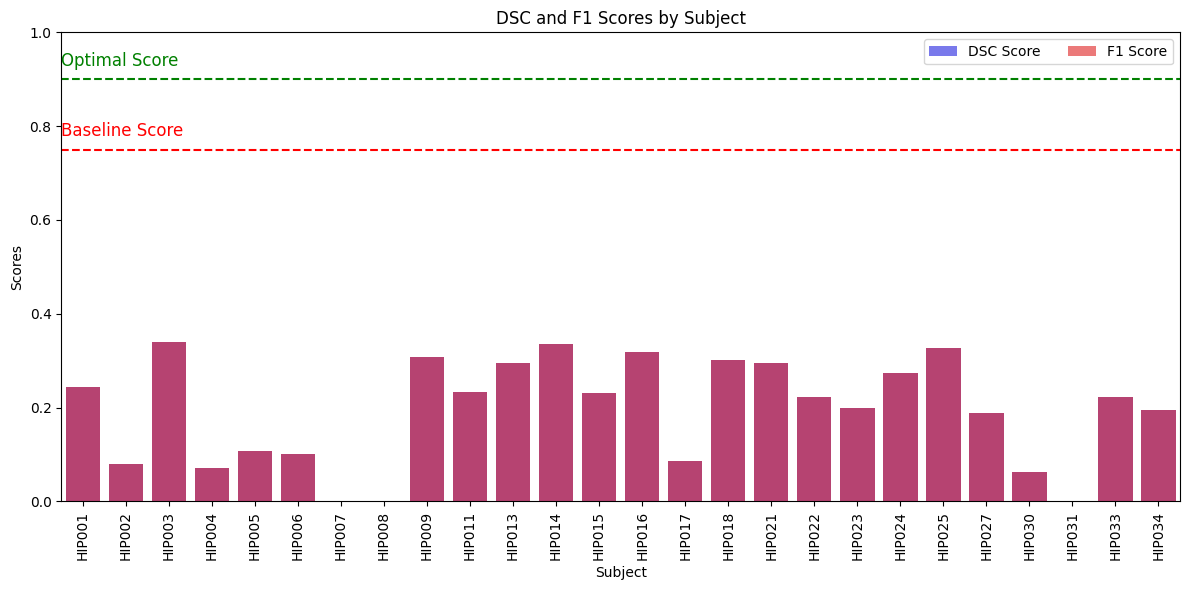

Plot saved to ./derivatives/f1/scores_comparison.png


<Figure size 640x480 with 0 Axes>

In [82]:

# Paths to the CSV files
dsc_csv_path = op.join(f1_dir, "dsc_scores.csv")
f1_csv_path = op.join(f1_dir, "f1_scores.csv")

# Read the DSC and F1 CSV files into pandas DataFrames
dsc_df = pd.read_csv(dsc_csv_path)
f1_df = pd.read_csv(f1_csv_path)

# Merge the DataFrames on the "Subject" column using an outer op.join
combined_df = pd.merge(dsc_df, f1_df, on="Subject", how="outer")

# Print the combined DataFrame to ensure it is correct
#print(combined_df)

# Initialize the matplotlib figure
plt.figure(figsize=(12, 6))

# Plot the DSC scores
sns.barplot(
    x="Subject",
    y="DSC Score",
    data=combined_df,
    label="DSC Score",
    color="b",
    alpha=0.6,
)

# Plot the F1 scores
sns.barplot(
    x="Subject", y="F1 Score", data=combined_df, label="F1 Score", color="r", alpha=0.6
)

# Add a legend and informative axis labels
plt.legend(ncol=2, loc="upper right", frameon=True)
plt.ylabel("Scores")
plt.xlabel("Subject")
plt.title("DSC and F1 Scores by Subject")

# Set y-axis limits
plt.ylim(0, 1)

# Add horizontal lines at y = 0.75 and y = 0.9 with labels
plt.axhline(y=0.75, color="red", linestyle="--")
plt.text(-0.5, 0.77, "Baseline Score", color="red", fontsize=12, va="bottom")
plt.axhline(y=0.9, color="green", linestyle="--")
plt.text(-0.5, 0.92, "Optimal Score", color="green", fontsize=12, va="bottom")

# Rotate the x labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

# Save the plot if needed
plot_path = op.join(f1_dir, "scores_comparison.png")
plt.savefig(plot_path)
print(f"Plot saved to {plot_path}")